#### Carraegar Dados

In [52]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install -U tensorflow

Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install -U numpy

Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from functools import reduce
import pickle
import warnings
warnings.filterwarnings("ignore")

In [56]:
##from google.colab import files
#uploaded = files.upload()

In [57]:
#from google.colab import files
#uploaded = files.upload()

In [58]:
read_file = pd.read_excel('base de descrições.xlsx')
#print(read_file)


###### Ler excel

In [59]:
read_file.to_csv (r'base_de_descricoes.csv', index = None, header=True)

###### Gerar csv

In [60]:
colnames=['DESCRICAO', 'GRAU', 'SITUAÇÃO DO SINISTRO']
df_01 = pd.read_csv("base_de_descricoes.csv" , usecols=colnames)
df_01.head(2)

,DESCRICAO,GRAU,SITUAÇÃO DO SINISTRO
0,- A CONDUTORA DO VEICULO SEGURADO CONDUZIA SEU...,COLISAO EM VEICULO ESTACIONADO,BAIXADO SEM RESSARCIMENTO
1,- A CONDUTORA DO VEICULO SEGURADO CONDUZIA SEU...,COLISAO EM VEICULO ESTACIONADO,BAIXADO SEM RESSARCIMENTO


In [61]:
df_01.shape

(87995, 3)

##### Agrupar as categorias

In [62]:
#Agrupar as categorias
df_01['SITUAÇÃO DO SINISTRO'].value_counts()

SITUAÇÃO DO SINISTRO
BAIXADO SEM RESSARCIMENTO    78268
BAIXADO COM RESSARCIMENTO     7611
SEGURADO CULPADO              2116
Name: count, dtype: int64

In [63]:
df_02 = df_01

In [64]:
df_02['SITUAÇÃO DO SINISTRO'] = df_02['SITUAÇÃO DO SINISTRO'].replace('SEGURADO CULPADO', 'BAIXADO COM RESSARCIMENTO')

In [65]:
df_02['SITUAÇÃO DO SINISTRO'].value_counts()

SITUAÇÃO DO SINISTRO
BAIXADO SEM RESSARCIMENTO    78268
BAIXADO COM RESSARCIMENTO     9727
Name: count, dtype: int64

### Análise Exploratória e Limpeza

In [66]:
def show_null(df):
    null_columns = (df.isnull().sum(axis=0)/len(df)).sort_values(ascending=False).index

    null_data = pd.concat([df.isnull().sum(axis=0),
                           (df.isnull().sum(axis=0)/len(df)).sort_values(ascending=False),
                           df.loc[:, df.columns.isin(list(null_columns))].dtypes],
                          axis=1)

    null_data = null_data.rename(columns={0: '#',
                                          1: '% null',
                                          2: 'type'}).sort_values(ascending=False,
                                                                  by='% null')

    return null_data

In [67]:
def plot_num(df, feature):
    fig = plt.figure(figsize=(12,8))
    gs = GridSpec(1,2)
    sns.countplot(x=feature, data=df, color='firebrick', ax=fig.add_subplot(gs[0,0]))
    plt.xlabel(feature)
    sns.stripplot(x=df[feature], color='darkcyan', ax=fig.add_subplot(gs[0,1]))
    plt.xlabel(None)
    plt.show()


In [68]:
def plot_cat(df, feature):
    fig = plt.figure(figsize=(12,8))
    ax = sns.countplot(data=df, x=feature)
    for p in ax.patches:

        ax.annotate(f'\n{p.get_height()}',
                    (p.get_x()+0.4, p.get_height()+5),
                    ha='center',
                    color='black')

    plt.xlabel('\n' + feature)
    plt.ylabel('Quantidade de Clientes')
    plt.show()

In [69]:
show_null(df_02)

,#,% null,type
DESCRICAO,110,0.00125,object
GRAU,0,0.00000,object
SITUAÇÃO DO SINISTRO,0,0.00000,object


In [70]:
df_02.dropna(inplace=True)

In [71]:
show_null(df_02)

,#,% null,type
DESCRICAO,0,0.0,object
GRAU,0,0.0,object
SITUAÇÃO DO SINISTRO,0,0.0,object


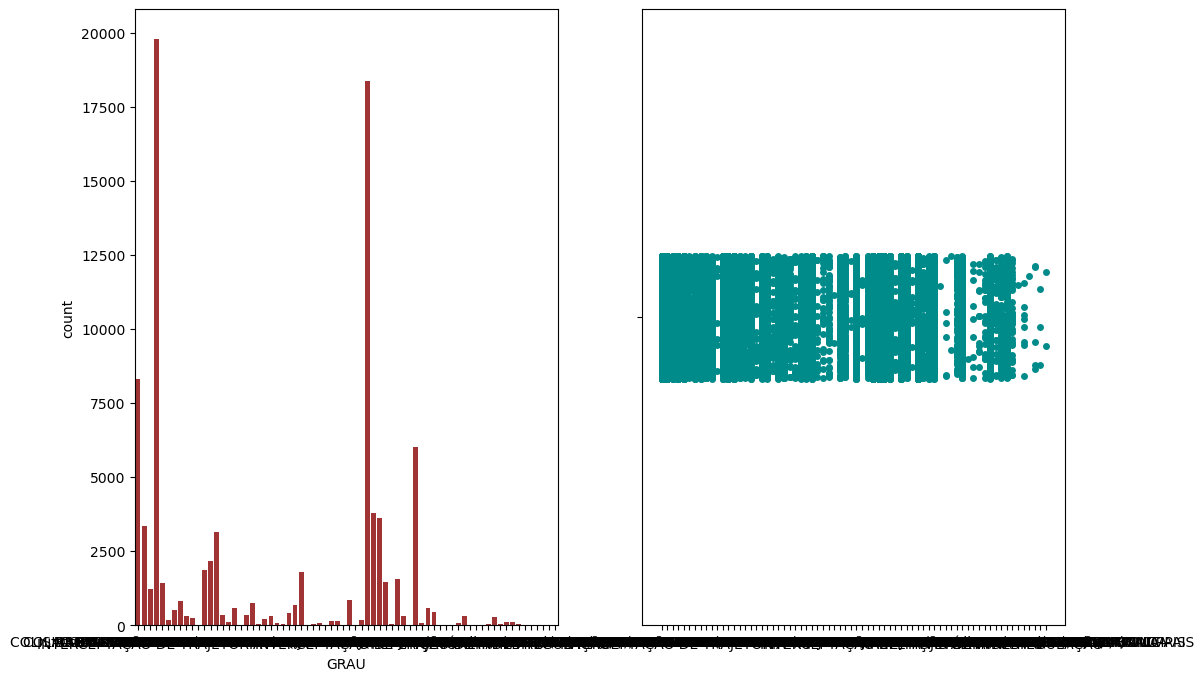

In [72]:
plot_num(df_02, 'GRAU')

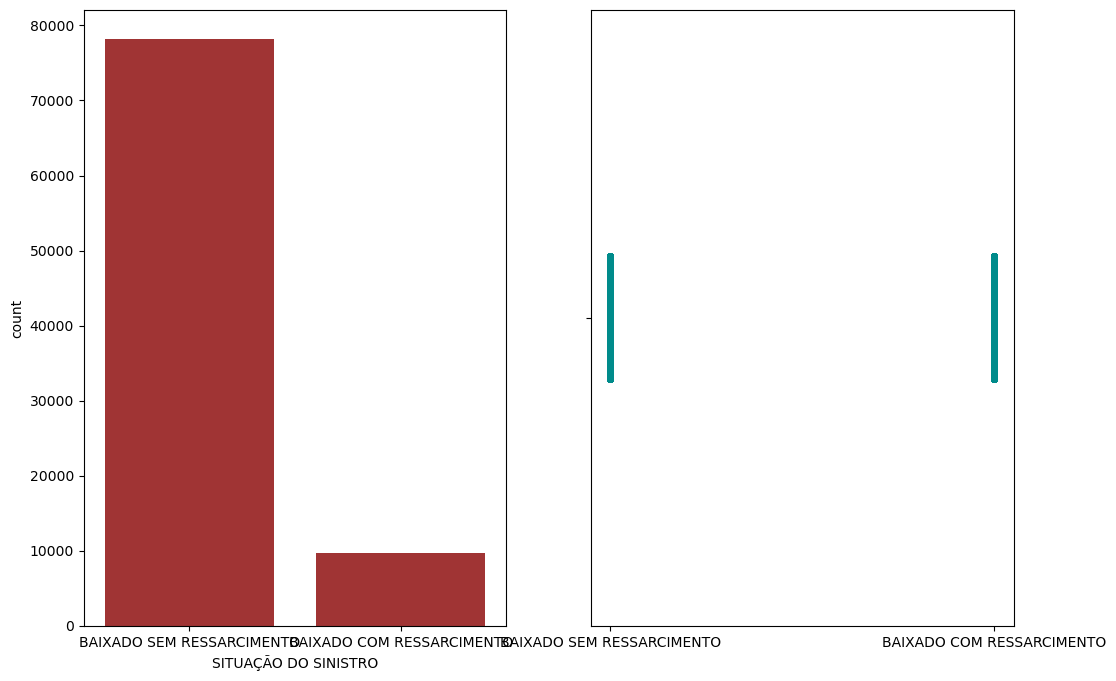

In [73]:
plot_num(df_02, 'SITUAÇÃO DO SINISTRO')

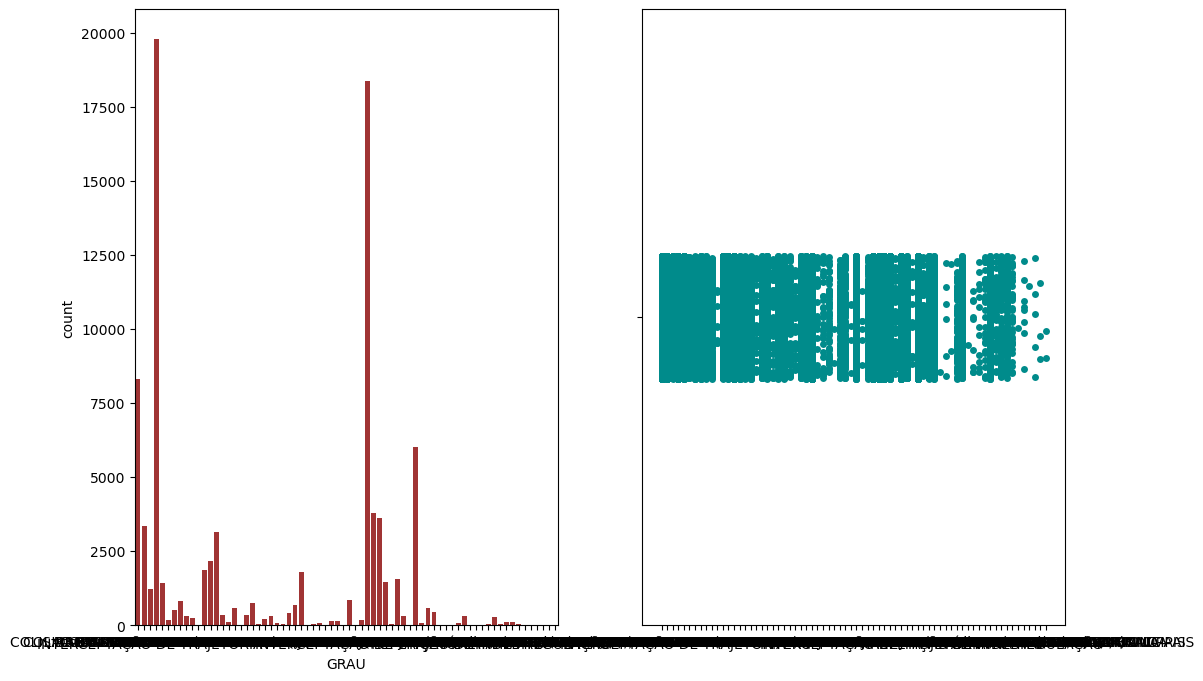

In [74]:
plot_num(df_02, 'GRAU')

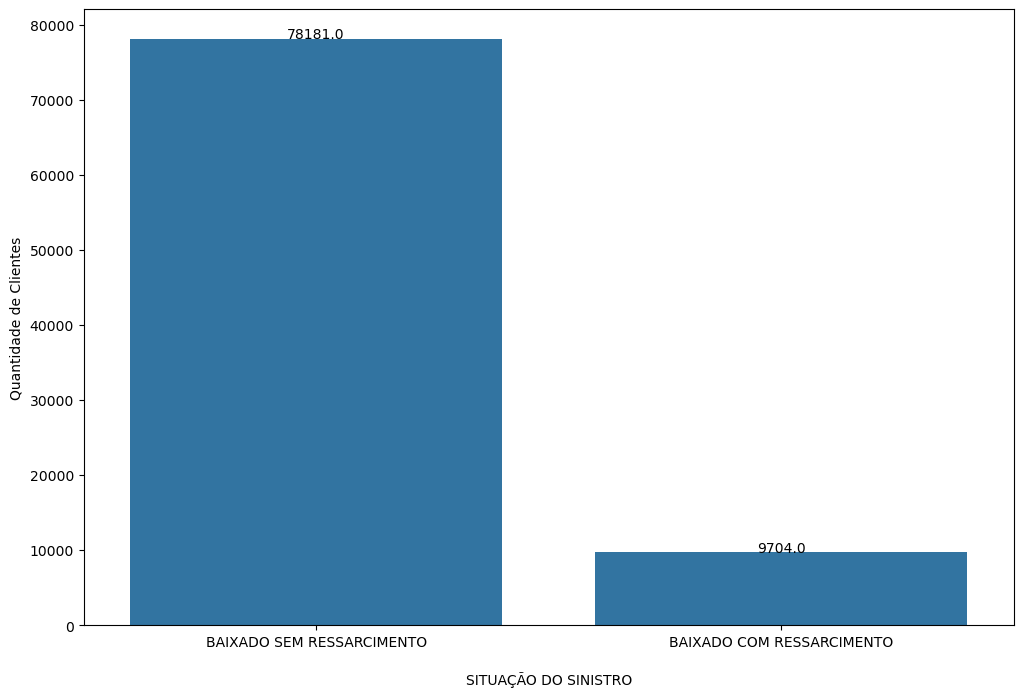

In [75]:
plot_cat(df_02, 'SITUAÇÃO DO SINISTRO')

### Machine Learning e Deep Learning para NLP na Prática

#### Introdução: classificação de texto

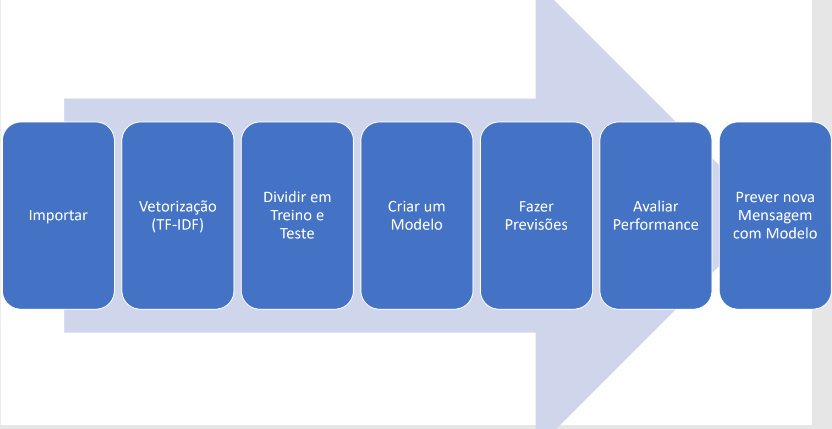

In [76]:
Image(filename='classificacoo de texto.png', width=1000, height=500)

##### Imports

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
df_02.shape

(87885, 3)

#### Classificação de ressarcimento parte 1

In [79]:
#Agrupar as categorias
df_02['SITUAÇÃO DO SINISTRO'].value_counts()

SITUAÇÃO DO SINISTRO
BAIXADO SEM RESSARCIMENTO    78181
BAIXADO COM RESSARCIMENTO     9704
Name: count, dtype: int64

In [80]:
previ = df_02['DESCRICAO']
classe = df_02['SITUAÇÃO DO SINISTRO']

In [81]:
vetorizador = TfidfVectorizer()
previsores = vetorizador.fit_transform(previ)
print(previsores.shape)

(87885, 69860)


In [82]:
print(vetorizador.get_feature_names_out()[10:100])

['0000323495' '0000325240' '0000365519' '0000390725' '0000419109'
 '0000511917' '0000535042' '0000598831' '0000609680' '0000619896'
 '000064627' '0000654389' '0000691361' '0000717866' '0000801063'
 '0000922925' '0000949470' '00009562662019' '0000966231' '0001'
 '0001009593' '0001040524' '0001075127' '0001080589' '0001083271'
 '0001121920' '0001232142' '0001264154' '0001559658' '0001621908'
 '0001678792' '0001778309' '0001784259' '00017890162021' '0001837129'
 '0002' '0002013474' '0002152743' '0002321540' '0002492606' '0003'
 '0003982' '00074' '000segurado' '001' '0010' '00115400621' '00123154395'
 '001272' '0016' '0017' '0019' '00196545780' '002' '0021' '002138738'
 '0022' '00220717702' '0023' '00233637265' '0024' '0025' '0027' '0028'
 '00281147316' '00287608646' '003' '00304217050' '00304751751'
 '00328328642' '00328864760' '0033' '00341' '0035' '0036' '00374334269'
 '0038' '00389278106' '0039' '004' '0040' '0041' '00411638777' '0042'
 '0044' '00450526879' '00456104216' '0046' '0049' 

#### Classificação de ressarcimento parte 2

In [83]:
#X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.3)

In [84]:
#X_teste.shape

In [85]:
#floresta = RandomForestClassifier(n_estimators=500)
#floresta.fit(X_treinamento,y_treinamento)

In [86]:
#previsoes = floresta.predict(X_teste)
#print(previsoes)

In [87]:
#print(confusion_matrix(y_teste, previsoes))

In [88]:
#print(accuracy_score(y_teste, previsoes))
#print(metrics.classification_report(y_teste, previsoes))

In [89]:
#df_02.head(100)

In [90]:
#mensagem = df_02['DESCRICAO'][99]
#mensagem

In [91]:
#mensagem = [mensagem]
#mensagem = vetorizador.transform(mensagem)
#previsao = floresta.predict(mensagem)
#print(previsao)

#### Classificação com Redes Neurais


#### Implementando uma Rede Neural Parte 1

##### Imports

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
import numpy as np

##### Transformar texto em numeros

In [93]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(df_02['SITUAÇÃO DO SINISTRO'])
#print(y)

In [94]:
mensagens = df_02['DESCRICAO'].values
X_train, X_test, y_train, y_test = train_test_split(mensagens, y, test_size=0.3)
#print(X_train)

###### A vetorização é o processo de converter texto em um formato numérico
O código começa criando um objeto CountVectorizer e ajustando-o aos dados de treinamento usando o método fit(). Em seguida, ele transforma os dados de treinamento e teste usando o método transform(). Finalmente, ele imprime a representação numérica dos dados de treinamento usando o método toarray().

In [ ]:
vetorizador = CountVectorizer()
vetorizador.fit(X_train)
X_train = vetorizador.transform(X_train)
X_test = vetorizador.transform(X_test)
print(X_train.toarray())

In [ ]:
np.set_printoptions(threshold=np.inf)

In [ ]:
#X_train.toarray()[0]

In [ ]:
print(X_train.shape[1])

#### Implementando uma Rede Neural Parte 2

In [ ]:
modelo = Sequential()
modelo.add(Dense(units=10,activation="relu",input_dim=X_train.shape[1]))
modelo.add(Dropout(0.1))
modelo.add(Dense(units=8,activation="relu")) ##  0 0u 1
modelo.add(Dropout(0.1))
modelo.add(Dense(units=1,activation="sigmoid")) #Camada de saida atua na probabilidade de ser 0 0u 1

#### Implementando uma Rede Neural Parte 3

In [ ]:
modelo.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
modelo.summary()

In [ ]:
modelo.fit(X_train, y_train,epochs=10,batch_size=10, verbose=True, validation_data=(X_test, y_test))

In [ ]:
loss, accuracy = modelo.evaluate(X_test,y_test)
print("Loss: ", loss)
print("Acurácia: ", accuracy)

In [ ]:
nova_previsao = modelo.predict(X_test)
#print(nova_previsao)

In [ ]:
prev = (nova_previsao > 0.5)
#print(prev)

In [ ]:
cm = confusion_matrix(y_test, prev)
print(cm)

 #20 [[  729  2138]
 #[ 2772 20727]]

In [ ]:
cm = confusion_matrix(y_test, prev)
plt.matshow(cm, cmap='Matriz de Confusão')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Criando seu próprio Embeddings

##### Implementando uma Rede Neural com Embeddings Parte 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding


from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.metrics import classification_report


In [ ]:
df_02.head(2)

In [ ]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(df_02['DESCRICAO'])
print(y)

In [ ]:
mensagens = df_02['DESCRICAO'].values
X_train, X_test, y_train, y_test = train_test_split(mensagens, y, test_size=0.3)

In [ ]:
#print('Relatório de classificação:\n', classification_report(y_train, X_test, digits=4))


In [ ]:
token = Tokenizer(num_words=1000)
token.fit_on_texts(X_train)

X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

In [ ]:
print(X_train)

In [ ]:
X_train = pad_sequences(X_train, padding="post", maxlen=500) ## tamanho maximo para cada vetor
X_test = pad_sequences(X_test, padding="post", maxlen=500)
print(X_train) # Matriz Densa

In [ ]:
print(len(token.word_index))

##### Implementando uma Rede Neural com Embeddings Parte 2

In [ ]:
modelo = Sequential()
modelo.add(Embedding(input_dim=len(token.word_index), output_dim=50,input_length=500)) #output_dim tamanho do vetor denso/input_length comprimento da sequencia
modelo.add(Flatten())

modelo.add(Dense(units=10,activation="relu"))
modelo.add(Dropout(0.1))
modelo.add(Dense(units=1,activation="sigmoid"))

In [ ]:
modelo.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
modelo.summary()

In [ ]:
modelo.fit(X_train, y_train,epochs=10,batch_size=10, verbose=True, validation_data=(X_test, y_test))

In [ ]:
loss, accuracy = modelo.evaluate(X_test,y_test)
print("Loss: ", loss)
print("Acurácia: ", accuracy)

In [ ]:
nova_previsao = modelo.predict(X_test)
print(nova_previsao)

In [ ]:
prev = (nova_previsao > 0.5)
#print(prev)

In [ ]:
cm = confusion_matrix(y_test, prev)
#print(cm)

In [ ]:
#print(classification_report(X_test,y_test))

In [ ]:
pip install transformers

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:

modelo.fit(X_train,y_train)
y_preds = modelo.predict(X_test)